In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.callbacks import EarlyStopping,ModelCheckpoint
import matplotlib.pyplot as plt

In [5]:
data=datasets.load_digits()
x=data.images
y=data.target

In [6]:
#Preprocess the data
x=x.reshape((x.shape[0],8,8,1)) #(number of samples,dimension)
x=x.astype('float32')/225 #scaling bcz 0-255 is pixel
y=to_categorical(y)

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu',input_shape=(8,8,1)))#convulution opration where 32--no of filter
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [16]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
earlystop=EarlyStopping(monitor='val_loss',patience=10)
best_weights=ModelCheckpoint('best_weights.h5',save_best_only=True,monitor='val_loss', mode='min')

In [31]:
history=model.fit(x_train,y_train,epochs=50,batch_size=32,validation_data=(x_test,y_test),
                 callbacks=[earlystop,best_weights]) #last can be skip

Epoch 1/50
45/45 [==============================] - 1s 4ms/step - loss: 2.2815 - accuracy: 0.3013 - val_loss: 2.2534 - val_accuracy: 0.3139
Epoch 2/50
45/45 [==============================] - 0s 2ms/step - loss: 2.1887 - accuracy: 0.4962 - val_loss: 2.1027 - val_accuracy: 0.6333
Epoch 3/50
45/45 [==============================] - 0s 2ms/step - loss: 1.9583 - accuracy: 0.6180 - val_loss: 1.7829 - val_accuracy: 0.7361


C:\Users\Student\AppData\Roaming\Python\Python39\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 4/50
45/45 [==============================] - 0s 2ms/step - loss: 1.5858 - accuracy: 0.7516 - val_loss: 1.3735 - val_accuracy: 0.7806
Epoch 5/50
45/45 [==============================] - 0s 2ms/step - loss: 1.1884 - accuracy: 0.8135 - val_loss: 1.0274 - val_accuracy: 0.8028
Epoch 6/50
45/45 [==============================] - 0s 2ms/step - loss: 0.8932 - accuracy: 0.8406 - val_loss: 0.7824 - val_accuracy: 0.8694
Epoch 7/50
45/45 [==============================] - 0s 2ms/step - loss: 0.7136 - accuracy: 0.8601 - val_loss: 0.6290 - val_accuracy: 0.8667
Epoch 8/50
45/45 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.8622 - val_loss: 0.5277 - val_accuracy: 0.8944
Epoch 9/50
45/45 [==============================] - 0s 2ms/step - loss: 0.5179 - accuracy: 0.8768 - val_loss: 0.4685 - val_accuracy: 0.9083
Epoch 10/50
45/45 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.8949 - val_loss: 0.4138 - val_accuracy: 0.9278
Epoch 11/50
45/45 [

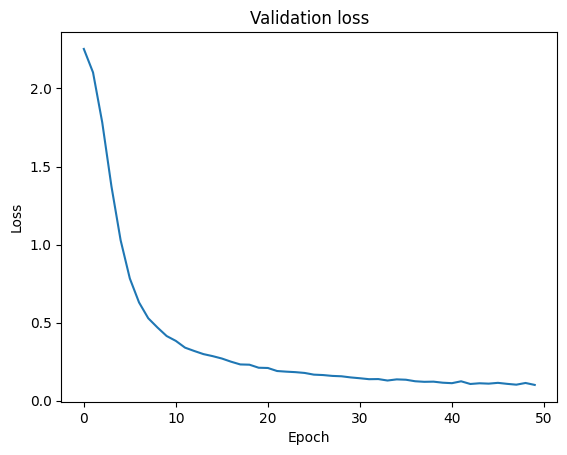

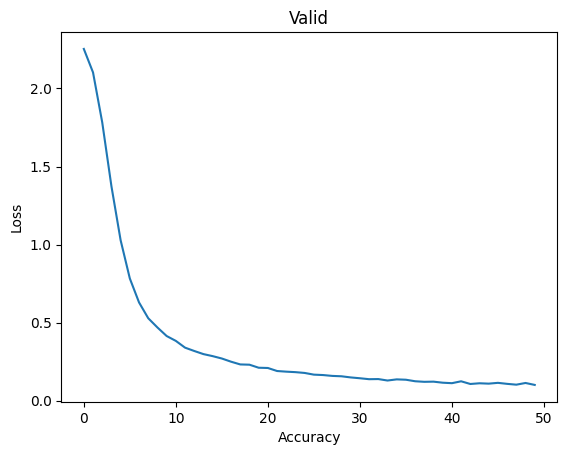

In [34]:
plt.plot(history.history['val_loss'])
plt.title('Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

plt.plot(history.history['val_loss'])
plt.title('Valid')
plt.ylabel('Loss')
plt.xlabel('Accuracy')
plt.show()


In [32]:
model.load_weights("best_weights.h5")


In [35]:
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=0)
print("test Loss",test_loss)
print("test Accuracy",test_acc)

test Loss 0.10047399997711182
test Accuracy 0.9750000238418579
